# Classification

* Classifiers we have seen in the chapter
    * `SGDClassifier`
    * `RandomForestClassifier`
    * `KNeighborsClassifier`
    
For Exercices:

* `SVC`
* `RandomForestClassifier`

In [180]:
import warnings
warnings.filterwarnings('ignore')

In [1]:
import sklearn
sklearn.__version__

'0.20.0'

In [181]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [3]:
X, y = mnist["data"], mnist["target"]

In [4]:
X.shape

(70000, 784)

In [5]:
y.shape

(70000,)

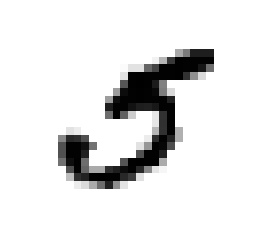

In [6]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)

plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("off");

In [7]:
some_digit_image.shape

(28, 28)

In [8]:
some_digit_image.ravel().shape

(784,)

In [9]:
some_digit_image.reshape(784,1).shape

(784, 1)

In [10]:
some_digit_image.reshape(1,-1).shape

(1, 784)

In [11]:
y[36000]

5.0

In [12]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

Moreover, some learning algorithms are sensitive to the order of the training instances, and they perform poorly if they get many similar instances in a row

In [13]:
import numpy as np

shuffle_index = np.random.permutation(60000)

X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

## Training a Binary Classifier

In [14]:
y_train_5 = (y_train == 5)  # True for all 5s, False for all other digits.
y_test_5 = (y_test == 5)

This is in part because SGD deals with training instances independently, one at a time (which also makes SGD well suited for online learning)

In [15]:
from sklearn.linear_model.stochastic_gradient import SGDClassifier

sgd_clf = SGDClassifier(random_state=42) ########### 
# The SGDClassifier uses a threshold equal to 0

sgd_clf.fit(X_train, y_train_5)

/Users/hakan/.pyenv/versions/miniconda3-latest/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [16]:
sgd_clf.predict([some_digit])

array([ True], dtype=bool)

### Performance Measures

### Measuring Accuracy Using Cross-Validation

In [17]:
len(y_train_5) - sum(y_train_5)
# not 5

54579

In [18]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)
# .2 test automatic , i think
# 54579 non-5
# The StratifiedKFold class performs stratified sampling (as explained in Chapter 2) to produce folds that contain a representative ratio of each class.

for train_index, test_index in skfolds.split(X_train, y_train_5):
    print("TRAIN:", len(train_index), "TEST:", len(test_index))
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train_5[test_index]

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))  # prints 0.9502, 0.96565 and 0.96495

TRAIN: 40000 TEST: 20000


/Users/hakan/.pyenv/versions/miniconda3-latest/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.9664
TRAIN: 40000 TEST: 20000


/Users/hakan/.pyenv/versions/miniconda3-latest/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.96945
TRAIN: 40000 TEST: 20000


/Users/hakan/.pyenv/versions/miniconda3-latest/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.95955


In [19]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")


/Users/hakan/.pyenv/versions/miniconda3-latest/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Users/hakan/.pyenv/versions/miniconda3-latest/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Users/hakan/.pyenv/versions/miniconda3-latest/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parame

array([ 0.9664 ,  0.96945,  0.95955])

Wow! Above 95% accuracy (ratio of correct predictions) on all cross-validation folds? This looks amazing, doesn’t it? Well, before you get too excited, let’s look at a very dumb classifier that just classifies every single image in the “not-5” class:

In [20]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [21]:
never_5_clf = Never5Classifier()

cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")
# falses with y_train = we find out the accuracy of falses in the dataset

array([ 0.9097 ,  0.91185,  0.9074 ])

That’s right, it has over 90% accuracy! This is simply because only about 10% of the images are 5s, so if you always guess that an image is not a 5, you will be right about 90% of the time. 

### Confusion Matrix

In [22]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

/Users/hakan/.pyenv/versions/miniconda3-latest/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Users/hakan/.pyenv/versions/miniconda3-latest/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Users/hakan/.pyenv/versions/miniconda3-latest/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parame

In [190]:
y_train_pred

array([ 0.,  6.,  9., ...,  2.,  3.,  7.])

In [23]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

array([[53972,   607],
       [ 1485,  3936]])

Each row in a confusion matrix represents an actual class, while each column represents a predicted class.

```python
>>> confusion_matrix(y_train_5, y_train_perfect_predictions)
array([[54579,    0],
       [    0, 5421]])
```

In [24]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred) # == 4393 / (4393 + 1215)

0.86638784943869684

In [25]:
recall_score(y_train_5, y_train_pred) # == 4393 / (4393 + 1028)

0.72606530160486993

Now your 5-detector does not look as shiny as it did when you looked at its accuracy. 

When it claims an image represents a 5, it is correct only 78% of the time (pricision - correctly predicted). Moreover, it only detects 81% of the 5s (related to actuals).

$F1_{score}$ the classifier will only get a high F1 score if both recall and precision are high.

In [26]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.79004415897230018

### Precision/Recall Tradeoff

In [27]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([ 185691.90845473])

In [28]:
threshold = 0

In [29]:
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([ True], dtype=bool)

In [30]:
threshold = 200000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False], dtype=bool)

how can you decide which threshold to use?

In [31]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method="decision_function")

/Users/hakan/.pyenv/versions/miniconda3-latest/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Users/hakan/.pyenv/versions/miniconda3-latest/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Users/hakan/.pyenv/versions/miniconda3-latest/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parame

In [32]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [33]:
precisions

array([ 0.09053106,  0.09051587,  0.09051739, ...,  1.        ,
        1.        ,  1.        ])

In [34]:
recalls

array([  1.00000000e+00,   9.99815532e-01,   9.99815532e-01, ...,
         3.68935621e-04,   1.84467810e-04,   0.00000000e+00])

In [35]:
thresholds

array([-1979341.51389821, -1977704.49082844, -1975444.28488176, ...,
         786968.48153464,   787686.54480859,   800392.41082314])

In [36]:
recalls

array([  1.00000000e+00,   9.99815532e-01,   9.99815532e-01, ...,
         3.68935621e-04,   1.84467810e-04,   0.00000000e+00])

In [37]:
recalls[:-1].shape

(59880,)

In [38]:
recalls.shape

(59881,)

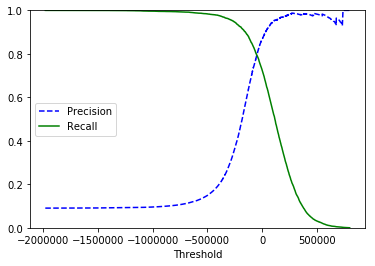

In [39]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="center left")
    plt.ylim([0, 1])

plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

Precision and recall versus the decision threshold

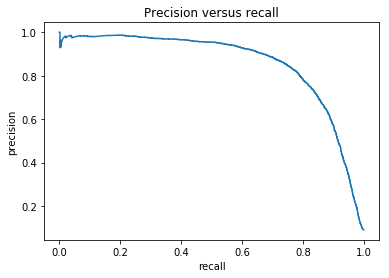

In [40]:
plt.plot(recalls[:-1], precisions[:-1], "-")
plt.xlabel("recall")
plt.ylabel("precision")
plt.title("Precision versus recall");

In [41]:
y_train_pred_90 = (y_scores > 70000) # threshold 70000 to get 80% precision

In [42]:
precision_score(y_train_5, y_train_pred_90)

0.92999135695764912

In [43]:
recall_score(y_train_5, y_train_pred_90)

0.59546209186496957

Great! BUT A high-precision classifier is not very useful if its recall is too low!

### The ROC Curve

The receiver operating characteristic (ROC) curve is another common tool used with binary classifiers.

FPR = The FPR is the ratio of negative instances that are incorrectly classified as positive.

$$ \frac{FP}{(TN + FP)}  $$

It is equal to one minus the true negative rate

In [44]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

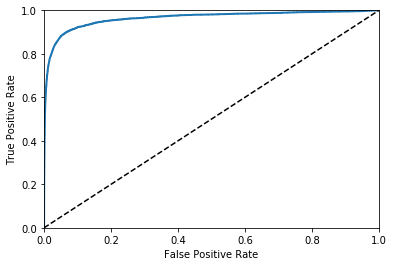

In [45]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(fpr, tpr)
plt.show()

Once again there is a tradeoff: the higher the recall (TPR), the more false positives (FPR) the classifier produces

a good classifier stays as far away from the dotted line as possible (toward the top-left corner).

One way to compare classifiers is to measure the area under the curve (AUC). A perfect classifier will have a ROC AUC equal to 1, whereas a purely random classifier will have a ROC AUC equal to 0.5.

In [46]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.96414106511238507

In [47]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42) #########

y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3, method="predict_proba")

/Users/hakan/.pyenv/versions/miniconda3-latest/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/hakan/.pyenv/versions/miniconda3-latest/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/hakan/.pyenv/versions/miniconda3-latest/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [48]:
y_scores_forest = y_probas_forest[:, 1]   # score = proba of positive class

fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)

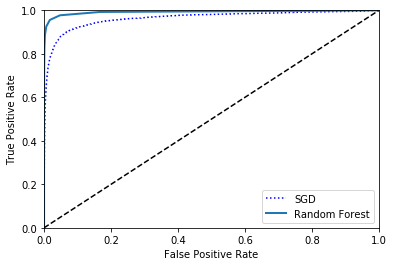

In [49]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")

In [50]:
roc_auc_score(y_train_5, y_scores_forest)

0.99260727649482583

 the RandomForestClassifier’s ROC curve looks much better than the SGDClassifier’s: it comes much closer to the top-left corner.

Try measuring the precision and recall scores

In [51]:
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(y_train_5, y_scores_forest)

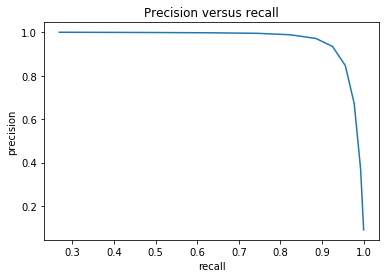

In [52]:
plt.plot(recalls_forest[:-1], precisions_forest[:-1], "-")
plt.xlabel("recall")
plt.ylabel("precision")
plt.title("Precision versus recall");

In [53]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)

/Users/hakan/.pyenv/versions/miniconda3-latest/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/hakan/.pyenv/versions/miniconda3-latest/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/hakan/.pyenv/versions/miniconda3-latest/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [54]:
precision_score(y_train_5, y_train_pred_forest) 

0.98847773099933522

In [55]:
recall_score(y_train_5, y_train_pred_forest)

0.82291090204759265

we find 98.5% precision and 82.8% recall. Not too bad!

## Multiclass Classification

In [56]:
sgd_clf.fit(X_train, y_train)  # y_train, not y_train_5

sgd_clf.predict([some_digit])

/Users/hakan/.pyenv/versions/miniconda3-latest/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


array([ 5.])

Under the hood, Scikit-Learn actually trained 10 binary classifiers, got their decision scores for the image, and selected the class with the highest score.

In [57]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-373890.86498891, -506812.4139105 , -276151.47226027,
        -221908.04269053, -386049.62686696,  185691.90845473,
        -752884.07882536, -195930.94018438, -623258.04838915,
        -662534.03417154]])

In [58]:
np.argmax(some_digit_scores)

5

In [59]:
sgd_clf.classes_

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.])

In [60]:
sgd_clf.classes_[5]

5.0

In [61]:
from sklearn.multiclass import OneVsOneClassifier

ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))

ovo_clf.fit(X_train, y_train)

ovo_clf.predict([some_digit])

/Users/hakan/.pyenv/versions/miniconda3-latest/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Users/hakan/.pyenv/versions/miniconda3-latest/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Users/hakan/.pyenv/versions/miniconda3-latest/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parame

array([ 5.])

Training a RandomForestClassifier is just as easy:

In [62]:
forest_clf.fit(X_train, y_train)

forest_clf.predict([some_digit])

/Users/hakan/.pyenv/versions/miniconda3-latest/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([ 5.])

Scikit-Learn did not have to run OvA or OvO because Random Forest classifiers can directly classify instances into multiple classes.

In [63]:
forest_clf.predict_proba([some_digit])

array([[ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.]])

In [64]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

/Users/hakan/.pyenv/versions/miniconda3-latest/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Users/hakan/.pyenv/versions/miniconda3-latest/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Users/hakan/.pyenv/versions/miniconda3-latest/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parame

array([ 0.87222555,  0.82319116,  0.87993199])

It gets over 85% on all test folds

In [65]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() #------------------------

X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

/Users/hakan/.pyenv/versions/miniconda3-latest/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Users/hakan/.pyenv/versions/miniconda3-latest/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Users/hakan/.pyenv/versions/miniconda3-latest/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parame

array([ 0.91281744,  0.90784539,  0.90793619])

simply scaling the inputs increases accuracy above 90%

## Error Analysis

In [66]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)

conf_mx = confusion_matrix(y_train, y_train_pred)

/Users/hakan/.pyenv/versions/miniconda3-latest/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Users/hakan/.pyenv/versions/miniconda3-latest/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/Users/hakan/.pyenv/versions/miniconda3-latest/lib/python3.5/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parame

In [67]:
conf_mx

array([[5727,    3,   27,    8,    9,   49,   49,   10,   38,    3],
       [   2, 6458,   49,   24,    5,   48,    4,   16,  125,   11],
       [  60,   35, 5341,   97,   75,   21,   89,   54,  174,   12],
       [  51,   39,  136, 5335,    1,  230,   37,   60,  148,   94],
       [  23,   25,   48,    9, 5375,   11,   57,   33,   75,  186],
       [  60,   43,   37,  187,   75, 4608,  115,   31,  174,   91],
       [  34,   20,   51,    2,   43,   83, 5639,    4,   42,    0],
       [  26,   21,   73,   26,   59,   12,    6, 5817,   16,  209],
       [  47,  152,   70,  148,   11,  177,   55,   28, 5029,  134],
       [  39,   34,   30,   82,  172,   44,    1,  223,   81, 5243]])

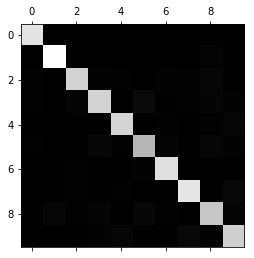

In [68]:
plt.matshow(conf_mx, cmap=plt.cm.gray);

In [69]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

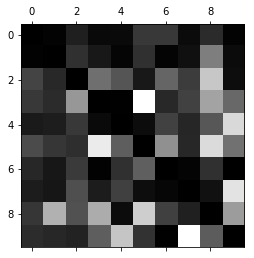

In [70]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()

Analyzing the confusion matrix can often give you insights on ways to improve your classifier

In [71]:
cl_a, cl_b = 3, 5

X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]

In [72]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

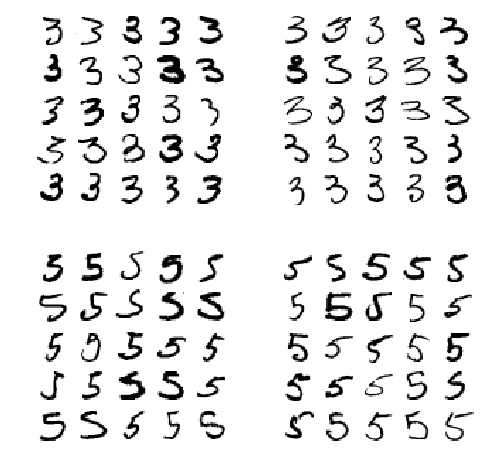

In [73]:
plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5) # 3 == 3 ; 1. index
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5) # 3 != 5 like 5 ; 2. index
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5) # 5 != 3 like 3 ; 3. index
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5) # 5 == 5 ; 4. index
plt.show()

## Multilabel Classification

In [74]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)

y_multilabel = np.c_[y_train_large, y_train_odd] ############# 

knn_clf = KNeighborsClassifier()

knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

This code creates a y_multilabel array containing two target labels for each digit image: the first indicates whether or not the digit is large (7, 8, or 9) and the second indicates whether or not it is odd.

In [75]:
knn_clf.predict([some_digit])
# so 5 is an odd number

array([[False,  True]], dtype=bool)

In [75]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)

f1_score(y_multilabel, y_train_knn_pred, average="macro")

0.97711523104666265

This assumes that all labels are equally important, which may not be the case.

## Multioutput Classification

In [76]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise

noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise

# target images will be the original images:
y_train_mod = X_train  ##############
y_test_mod = X_test    ##############

In [77]:
some_index = 900

In [78]:
knn_clf.fit(X_train_mod, y_train_mod)

clean_digit = knn_clf.predict([X_test_mod[some_index]])

clean_digit

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,  29,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  44, 169, 169,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0

In [79]:
clean_digit.shape

(1, 784)

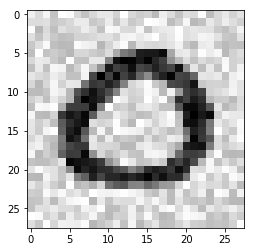

In [80]:
# noisy image
plt.imshow(X_test_mod[some_index].reshape(28,28), cmap=matplotlib.cm.binary);

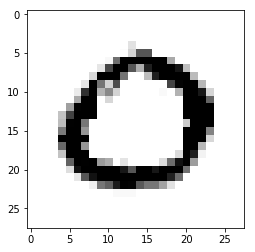

In [81]:
# clean image
plt.imshow(clean_digit.reshape(28,28), cmap=matplotlib.cm.binary);

## Exercices




### 1 

Try to build a classifier for the MNIST dataset that achieves over 97% accuracy on the test set. Hint: the KNeighborsClassifier works quite well for this task; you just need to find good hyperparameter values


In [82]:
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [83]:
X_train.shape

(60000, 784)

In [84]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

```python
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=.2, random_state=42)

for train_index, test_index in sss.split(X, y):
    strat_x_train = X_train[train_index]
    strat_x_test  = X_train[test_index]
```

In [85]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_grid = dict(n_neighbors=[5, 7, 9], weights=['uniform'])

# Multiclass Classification
kc = KNeighborsClassifier() ################ default; n_neighbors=5

grid_seach = GridSearchCV(kc, param_grid=param_grid, cv=3, verbose=3, n_jobs=-1)
# scoring='neg_mean_squared_error'=

In [ ]:
# Multiclass Classification
grid_seach.fit(X_train_scaled, y_train)

### 2

Write a function that can shift an MNIST image in any direction (left, right, up, or down) by one pixel. Then, for each image in the training set, create four shifted copies (one per direction) and add them to the training set. Finally, train your best model on this expanded training set and measure its accuracy on the test set. You should observe that your model performs even better now! This technique of artificially growing the training set is called **data augmentation** or **training set expansion**.

#### Shift

In [86]:
from scipy.ndimage.interpolation import shift
from scipy.ndimage.interpolation import rotate
from scipy.ndimage.interpolation import zoom

In [87]:
X_train[0].shape

(784,)

In [88]:
shifted_image = shift(X_train[0].reshape(28,28), [1,4], cval=0)

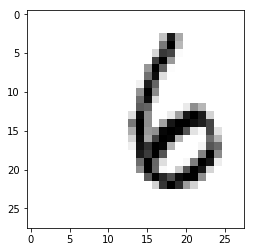

In [89]:
plt.imshow(shifted_image, cmap=matplotlib.cm.binary);

In [90]:
shifted_image.reshape(-1,).shape

(784,)

In [93]:
def shift_images(images):
    augmented_images = []
    flat_size = images[0].shape[0]
    image_size = np.sqrt(flat_size).astype(int)
    for image in images:
        reformat_image = np.reshape(image, (image_size, image_size))
        bottom = shift(reformat_image.reshape(image_size, image_size), [3,1], cval=0).reshape(-1,)
        right =  shift(reformat_image.reshape(image_size, image_size), [1,3], cval=0).reshape(-1,)
        top = shift(reformat_image.reshape(image_size, image_size), [-3,1], cval=0).reshape(-1,)
        left = shift(reformat_image.reshape(image_size, image_size), [1,-3], cval=0).reshape(-1,)
        augmented_images.append(bottom)
        augmented_images.append(top)
        augmented_images.append(right)
        augmented_images.append(left)
    return augmented_images

In [94]:
shifted_train_images = shift_images(X_train)

In [ ]:
def shift_image(image, dx, dy):
    shape = image.shape[0]
    image_size = np.sqrt(shape).astype(int)
    image = image.reshape((image_size, image_size))
    shifted_image = shift(image, [dy, dx], cval=0, mode="constant")
    return shifted_image.reshape([-1])

In [ ]:
X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]

for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    for image, label in zip(X_train, y_train):
        X_train_augmented.append(shift_image(image, dx, dy))
        y_train_augmented.append(label)

In [95]:
len(shifted_train_images)

240000

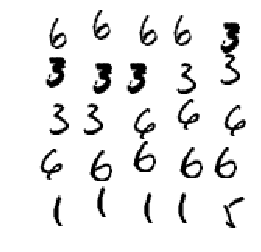

In [96]:
plot_digits(shifted_train_images[:25], images_per_row=5)

In [97]:
shifted_test_images = shift_images(X_test)

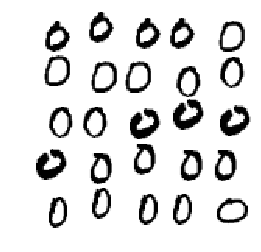

In [98]:
plot_digits(shifted_test_images[:25], images_per_row=5)

#### Rotate

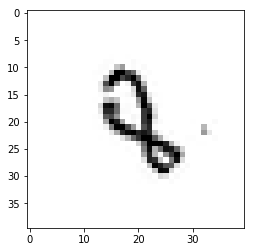

In [93]:
rotated_image = rotate(X_train[0].reshape(28,28), 45, axes=(1,0))
plt.imshow(rotated_image, cmap=matplotlib.cm.binary);

#### Zoom

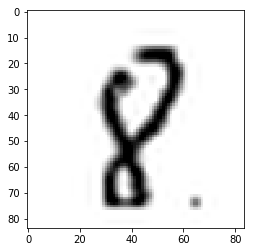

In [103]:
zoom_image = zoom(X_train[0].reshape(28,28), 3)
plt.imshow(zoom_image, cmap=matplotlib.cm.binary);

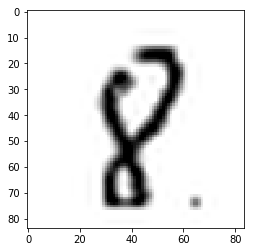

In [108]:
zoom_image = zoom(X_train[0].reshape(28,28), 9.)
plt.imshow(rotated_image, cmap=matplotlib.cm.binary);

### 3



In [99]:
import os

TITANIC_PATH = os.path.join("datasets", "titanic")

In [100]:
import pandas as pd

def load_titanic_data(filename, titanic_path=TITANIC_PATH):
    csv_path = os.path.join(titanic_path, filename)
    return pd.read_csv(csv_path)

In [101]:
train_data = load_titanic_data("train.csv")
test_data = load_titanic_data("test.csv")

In [123]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The attributes have the following meaning:

* Survived: that's the target, 0 means the passenger did not survive, while 1 means he/she survived.
* Pclass: passenger class.
* Name, Sex, Age: self-explanatory
* SibSp: how many siblings & spouses of the passenger aboard the Titanic.
* Parch: how many children & parents of the passenger aboard the Titanic.
* Ticket: ticket id
* Fare: price paid (in pounds)
* Cabin: passenger's cabin number
* Embarked: where the passenger embarked the Titanic

In [102]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Okay, the Age, Cabin and Embarked attributes are sometimes null (less than 891 non-null), especially the Cabin (77% are null). We will ignore the Cabin for now and focus on the rest. The Age attribute has about 19% null values, so we will need to decide what to do with them. Replacing null values with the median age seems reasonable.

In [103]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


* Yikes, only 38% **Survived**. :( That's close enough to 40%, so accuracy will be a reasonable metric to evaluate our model.
* The mean **Fare** was £32.20, which does not seem so expensive (but it was probably a lot of money back then).
* The mean **Age** was less than 30 years old.

In [104]:
train_data["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [105]:
train_data["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [106]:
train_data["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [107]:
train_data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

The Embarked attribute tells us where the passenger embarked: C=Cherbourg, Q=Queenstown, S=Southampton.

In [108]:
from sklearn.base import BaseEstimator, TransformerMixin

# A class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

In [119]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer

imputer = Imputer(strategy="median")

num_pipeline = Pipeline([
        ("select_numeric", DataFrameSelector(["Age", "SibSp", "Parch", "Fare"])),
        ("imputer", Imputer(strategy="median")),
    ])

/Users/hakan/.pyenv/versions/miniconda3-latest/lib/python3.5/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/hakan/.pyenv/versions/miniconda3-latest/lib/python3.5/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [110]:
num_pipeline.fit_transform(train_data)

array([[ 22.    ,   1.    ,   0.    ,   7.25  ],
       [ 38.    ,   1.    ,   0.    ,  71.2833],
       [ 26.    ,   0.    ,   0.    ,   7.925 ],
       ..., 
       [ 28.    ,   1.    ,   2.    ,  23.45  ],
       [ 26.    ,   0.    ,   0.    ,  30.    ],
       [ 32.    ,   0.    ,   0.    ,   7.75  ]])

In [123]:
# Inspired from stackoverflow.com/questions/25239958
class MostFrequentImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.most_frequent_ = pd.Series([X[c].value_counts().index[0] for c in X], index=X.columns)
        print(self.most_frequent_)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.most_frequent_)

In [124]:
from sklearn.preprocessing import OneHotEncoder

cat_pipeline = Pipeline([
        ("select_cat", DataFrameSelector(["Pclass", "Sex", "Embarked"])),
        ("imputer", MostFrequentImputer()),
        ("cat_encoder", OneHotEncoder(sparse=False)),
])

In [125]:
cat_pipeline.fit_transform(train_data)

Pclass         3
Sex         male
Embarked       S
dtype: object


array([[ 0.,  0.,  1., ...,  0.,  0.,  1.],
       [ 1.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  1.],
       ..., 
       [ 0.,  0.,  1., ...,  0.,  0.,  1.],
       [ 1.,  0.,  0., ...,  1.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  1.,  0.]])

#### OneHotEncoder

In [132]:
encoder = OneHotEncoder(sparse=False)
encoder.fit_transform(np.array([[3], [2], ['x']]))

array([[ 0.,  1.,  0.],
       [ 1.,  0.,  0.],
       [ 0.,  0.,  1.]])

Finally, let's join the numerical and categorical pipelines:

In [133]:
from sklearn.pipeline import FeatureUnion
preprocess_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

In [136]:
X_train = preprocess_pipeline.fit_transform(train_data)
X_train

Pclass         3
Sex         male
Embarked       S
dtype: object


array([[ 22.,   1.,   0., ...,   0.,   0.,   1.],
       [ 38.,   1.,   0., ...,   1.,   0.,   0.],
       [ 26.,   0.,   0., ...,   0.,   0.,   1.],
       ..., 
       [ 28.,   1.,   2., ...,   0.,   0.,   1.],
       [ 26.,   0.,   0., ...,   1.,   0.,   0.],
       [ 32.,   0.,   0., ...,   0.,   1.,   0.]])

In [137]:
y_train = train_data["Survived"]

 Let's start with an SVC:

In [159]:
X_train.shape

(891, 12)

In [141]:
from sklearn.svm import SVC

svm_clf = SVC(gamma='auto') ###################

svm_clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [142]:
X_test = preprocess_pipeline.transform(test_data)
y_pred = svm_clf.predict(X_test)

Why don't we use cross-validation to have an idea of how good our model is?

In [143]:
from sklearn.model_selection import cross_val_score

svm_scores = cross_val_score(svm_clf, X_train, y_train, cv=10)
svm_scores.mean()

0.73652508228350921

Okay, over 73% accuracy, clearly better than random chance, but it's not a great score. 

So let's try to build a model that reaches 80% accuracy.

In [146]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42, n_estimators=10) #############

forest_scores = cross_val_score(forest_clf, X_train, y_train, cv=10)
forest_scores.mean()

0.8115690614005221

That's much better!

In [157]:
svm_scores

array([ 0.66666667,  0.65555556,  0.71910112,  0.75280899,  0.75280899,
        0.73033708,  0.76404494,  0.74157303,  0.75280899,  0.82954545])

In [158]:
forest_scores

array([ 0.73333333,  0.81111111,  0.73033708,  0.85393258,  0.87640449,
        0.79775281,  0.83146067,  0.78651685,  0.85393258,  0.84090909])

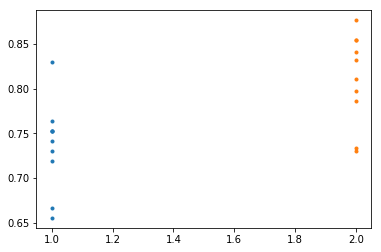

In [156]:
plt.plot([1]*10, svm_scores, ".")
plt.plot([2]*10, forest_scores, ".")

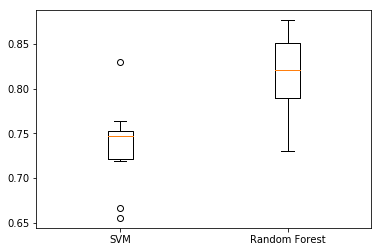

In [155]:
plt.boxplot([svm_scores, forest_scores], labels=("SVM","Random Forest"));

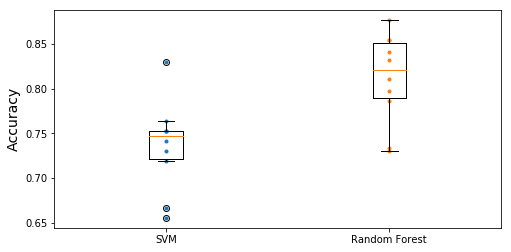

In [163]:
plt.figure(figsize=(8, 4))

plt.plot([1]*10, svm_scores, ".")
plt.plot([2]*10, forest_scores, ".")

plt.boxplot([svm_scores, forest_scores], labels=("SVM","Random Forest"))
plt.ylabel("Accuracy", fontsize=14)
plt.show()

Specifically, if the lower quartile is $Q_1$ and the upper quartile is $Q_3$, then the interquartile range $IQR = Q_3 - Q_1$ (this is the box's height), and any score lower than $Q_1 - 1.5 \times IQR$ is a flier, and so is any score greater than $Q3 + 1.5 \times IQR$.

To improve this result further, you could:

* Compare many more models and tune hyperparameters using cross validation and grid search,
* Do more feature engineering, for example:
    * replace SibSp and Parch with their sum,
    * try to identify parts of names that correlate well with the Survived attribute (e.g. if the name contains "Countess", then survival seems more likely),
* try to convert numerical attributes to categorical attributes: for example, different age groups had very different survival rates (see below), so it may help to create an age bucket category and use it instead of the age. Similarly, it may be useful to have a special category for people traveling alone since only 30% of them survived (see below).

In [171]:
train_data["AgeBucket"] = (train_data["Age"] // 15) * 15
train_data[["AgeBucket", "Survived"]].groupby(['AgeBucket']).mean()

,Survived
AgeBucket,
0.0,0.576923
15.0,0.362745
30.0,0.423256
45.0,0.404494
60.0,0.240000
75.0,1.000000


In [152]:
train_data["Age"].mean()

29.69911764705882

In [153]:
train_data["RelativesOnboard"] = train_data["SibSp"] + train_data["Parch"]
train_data[["RelativesOnboard", "Survived"]].groupby(['RelativesOnboard']).mean()

,Survived
RelativesOnboard,
0,0.303538
1,0.552795
2,0.578431
3,0.724138
4,0.200000
5,0.136364
6,0.333333
7,0.000000
10,0.000000


### 4. Spam classifier

In [173]:
import tarfile
from six.moves import urllib

DOWNLOAD_ROOT = "http://spamassassin.apache.org/old/publiccorpus/"
HAM_URL = DOWNLOAD_ROOT + "20030228_easy_ham.tar.bz2"
SPAM_URL = DOWNLOAD_ROOT + "20030228_spam.tar.bz2"
SPAM_PATH = os.path.join("datasets", "spam")

def fetch_spam_data(spam_url=SPAM_URL, spam_path=SPAM_PATH):
    if not os.path.isdir(spam_path):
        os.makedirs(spam_path)
    for filename, url in (("ham.tar.bz2", HAM_URL), ("spam.tar.bz2", SPAM_URL)):
        path = os.path.join(spam_path, filename)
        if not os.path.isfile(path):
            urllib.request.urlretrieve(url, path)
            
        tar_bz2_file = tarfile.open(path)
        tar_bz2_file.extractall(path=SPAM_PATH)
        tar_bz2_file.close()

In [174]:
fetch_spam_data()

In [175]:
HAM_DIR = os.path.join(SPAM_PATH, "easy_ham")
SPAM_DIR = os.path.join(SPAM_PATH, "spam")

ham_filenames = [name for name in sorted(os.listdir(HAM_DIR)) if len(name) > 20]
spam_filenames = [name for name in sorted(os.listdir(SPAM_DIR)) if len(name) > 20]

In [178]:
len(ham_filenames)

2500

In [179]:
len(spam_filenames)

500

In [177]:
import email
import email.policy

def load_email(is_spam, filename, spam_path=SPAM_PATH):
    directory = "spam" if is_spam else "easy_ham"
    with open(os.path.join(spam_path, directory, filename), "rb") as f:
        return email.parser.BytesParser(policy=email.policy.default).parse(f)

In [182]:
ham_emails = [load_email(is_spam=False, filename=name) for name in ham_filenames]
spam_emails = [load_email(is_spam=True, filename=name) for name in spam_filenames]

In [183]:
print(ham_emails[1].get_content().strip())

Martin A posted:
Tassos Papadopoulos, the Greek sculptor behind the plan, judged that the
 limestone of Mount Kerdylio, 70 miles east of Salonika and not far from the
 Mount Athos monastic community, was ideal for the patriotic sculpture. 
 
 As well as Alexander's granite features, 240 ft high and 170 ft wide, a
 museum, a restored amphitheatre and car park for admiring crowds are
planned
---------------------
So is this mountain limestone or granite?
If it's limestone, it'll weather pretty fast.

------------------------ Yahoo! Groups Sponsor ---------------------~-->
4 DVDs Free +s&p Join Now
http://us.click.yahoo.com/pt6YBB/NXiEAA/mG3HAA/7gSolB/TM
---------------------------------------------------------------------~->

To unsubscribe from this group, send an email to:
forteana-unsubscribe@egroups.com

 

Your use of Yahoo! Groups is subject to http://docs.yahoo.com/info/terms/


In [184]:
print(spam_emails[6].get_content().strip())

Help wanted.  We are a 14 year old fortune 500 company, that is
growing at a tremendous rate.  We are looking for individuals who
want to work from home.

This is an opportunity to make an excellent income.  No experience
is required.  We will train you.

So if you are looking to be employed from home with a career that has
vast opportunities, then go:

http://www.basetel.com/wealthnow

We are looking for energetic and self motivated people.  If that is you
than click on the link and fill out the form, and one of our
employement specialist will contact you.

To be removed from our link simple go to:

http://www.basetel.com/remove.html


4139vOLW7-758DoDY1425FRhM1-764SMFc8513fCsLl40


In [185]:
def get_email_structure(email):
    if isinstance(email, str):
        return email
    payload = email.get_payload()
    if isinstance(payload, list):
        return "multipart({})".format(", ".join([
            get_email_structure(sub_email)
            for sub_email in payload
        ]))
    else:
        return email.get_content_type()

In [186]:
from collections import Counter

def structures_counter(emails):
    structures = Counter()
    for email in emails:
        structure = get_email_structure(email)
        structures[structure] += 1
    return structures

In [187]:
structures_counter(ham_emails).most_common()

[('text/plain', 2408),
 ('multipart(text/plain, application/pgp-signature)', 66),
 ('multipart(text/plain, text/html)', 8),
 ('multipart(text/plain, text/plain)', 4),
 ('multipart(text/plain)', 3),
 ('multipart(text/plain, application/octet-stream)', 2),
 ('multipart(multipart(text/plain, text/plain, text/plain), application/pgp-signature)',
  1),
 ('multipart(text/plain, multipart(text/plain))', 1),
 ('multipart(text/plain, text/enriched)', 1),
 ('multipart(text/plain, application/ms-tnef, text/plain)', 1),
 ('multipart(text/plain, application/x-java-applet)', 1),
 ('multipart(text/plain, application/x-pkcs7-signature)', 1),
 ('multipart(text/plain, multipart(text/plain, text/plain), text/rfc822-headers)',
  1),
 ('multipart(text/plain, multipart(text/plain, text/plain), multipart(multipart(text/plain, application/x-pkcs7-signature)))',
  1),
 ('multipart(text/plain, video/mng)', 1)]

In [188]:
structures_counter(spam_emails).most_common()

[('text/plain', 218),
 ('text/html', 183),
 ('multipart(text/plain, text/html)', 45),
 ('multipart(text/html)', 20),
 ('multipart(text/plain)', 19),
 ('multipart(multipart(text/html))', 5),
 ('multipart(text/plain, image/jpeg)', 3),
 ('multipart(text/html, application/octet-stream)', 2),
 ('multipart(text/plain, application/octet-stream)', 1),
 ('multipart(text/html, text/plain)', 1),
 ('multipart(multipart(text/plain, text/html), image/gif)', 1),
 ('multipart/alternative', 1),
 ('multipart(multipart(text/html), application/octet-stream, image/jpeg)', 1)]

In [189]:
for header, value in spam_emails[0].items():
    print(header,":",value)

Return-Path : <12a1mailbot1@web.de>
Delivered-To : zzzz@localhost.spamassassin.taint.org
Received : from localhost (localhost [127.0.0.1])	by phobos.labs.spamassassin.taint.org (Postfix) with ESMTP id 136B943C32	for <zzzz@localhost>; Thu, 22 Aug 2002 08:17:21 -0400 (EDT)
Received : from mail.webnote.net [193.120.211.219]	by localhost with POP3 (fetchmail-5.9.0)	for zzzz@localhost (single-drop); Thu, 22 Aug 2002 13:17:21 +0100 (IST)
Received : from dd_it7 ([210.97.77.167])	by webnote.net (8.9.3/8.9.3) with ESMTP id NAA04623	for <zzzz@spamassassin.taint.org>; Thu, 22 Aug 2002 13:09:41 +0100
From : 12a1mailbot1@web.de
Received : from r-smtp.korea.com - 203.122.2.197 by dd_it7  with Microsoft SMTPSVC(5.5.1775.675.6);	 Sat, 24 Aug 2002 09:42:10 +0900
To : dcek1a1@netsgo.com
Subject : Life Insurance - Why Pay More?
Date : Wed, 21 Aug 2002 20:31:57 -1600
MIME-Version : 1.0
Message-ID : <0103c1042001882DD_IT7@dd_it7>
Content-Type : text/html; charset="iso-8859-1"
Content-Transfer-Encoding : qu

1) A colleague asks you to do an analysis on a dataset, df, full of missing data. You want to get rid of all rows with missing data before you start analyzing, which line of code do you start with?

> df = df.dropna()

2) Complete the following import statement:

```python
from sklearn.model_selection import ......
```

a. `train_test_split` ==

b. `test_train_split`

c. `split_train_test`

d. `split_test_train`

3) When plotting the output of the function roc_curve, which output variable should be plotted on which axis if the following line of code assigns the variables?

```python
fpr,tpr,thresholds = roc_curve(y_test,y_pred_prob)
```

A: `fpr` on the `x` axis, `tpr` on the `y` axis

4) What does the score method used on regression models tell you?

A: The amount of variance in the target variable that is predicted from the feature variables.

5) Choose the correct import statement for linear regression.

A: `from sklearn.linear_model import LinearRegression`

6) Which of the following statements about k-Nearest Neighbors classification is correct?

a. A model with a smaller k is more likely to overfit to the data. ===

b. A model with a larger k is more likely to overfit to the data.

7) You have data about students at a university and want to predict their major given their gender. Which type of supervised learning is this?

a. either
 
b. Regression

c. Classification ==

8) Choose the correct import statement to use a scaler within a pipeline.

a. `from sklearn.pipeline import scale`

b. `from sklearn.preprocessing import scaler`

c. `from sklearn.pipeline import scaler`

d. `from sklearn.preprocessing import scale` ==